In [13]:
import cv2
import numpy as np

# Load input and output images
input_image = cv2.imread("input2.jpg", cv2.IMREAD_GRAYSCALE)
output_image = cv2.imread("output2.jpg", cv2.IMREAD_GRAYSCALE)

# Calculate mean pixel intensity
input_mean = np.mean(input_image)
output_mean = np.mean(output_image)

print(f"Input Mean: {input_mean}, Output Mean: {output_mean}")


Input Mean: 14.781572265625, Output Mean: 32.448759765625


In [14]:
from skimage.metrics import structural_similarity as ssim

# Compute SSIM
ssim_value = ssim(input_image, output_image)
print(f"SSIM: {ssim_value}")


SSIM: 0.6318108073005103


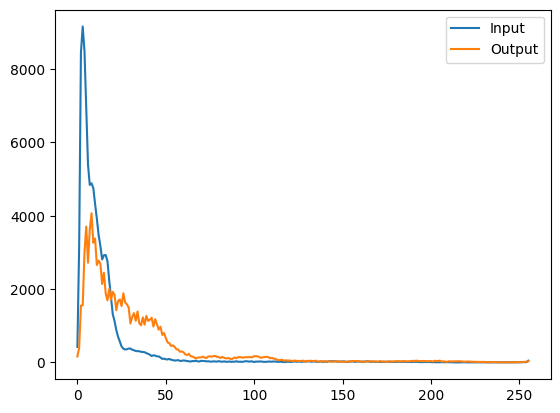

In [15]:
import matplotlib.pyplot as plt

# Compute histograms
input_hist = cv2.calcHist([input_image], [0], None, [256], [0, 256])
output_hist = cv2.calcHist([output_image], [0], None, [256], [0, 256])

# Plot histograms
plt.plot(input_hist, label="Input")
plt.plot(output_hist, label="Output")
plt.legend()
plt.show()


In [16]:
import numpy as np
import cv2
from skimage.metrics import structural_similarity as compare_ssim
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from scipy.stats import entropy
from skimage.color import rgb2lab, deltaE_cie76

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    return mse

# Function to calculate Entropy
def calculate_entropy(img):
    hist, _ = np.histogram(img.flatten(), bins=256, range=(0, 256), density=True)
    return entropy(hist)

# Function to calculate Delta E (Color Difference)
def calculate_delta_e(img1, img2):
    # Convert RGB to Lab Color Space
    img1_lab = rgb2lab(img1 / 255.0)
    img2_lab = rgb2lab(img2 / 255.0)
    # Calculate Delta E
    delta_e = deltaE_cie76(img1_lab, img2_lab)
    return np.mean(delta_e)

# Function to compare histograms
def compare_histograms(img1, img2):
    hist1 = cv2.calcHist([img1], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
    hist_diff = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
    return hist_diff

# Load input and output images
input_image = cv2.imread("input2.jpg")
output_image = cv2.imread("output2.jpg")

# Ensure both images are the same size
if input_image.shape != output_image.shape:
    output_image = cv2.resize(output_image, (input_image.shape[1], input_image.shape[0]))

# Convert images to grayscale
input_gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
output_gray = cv2.cvtColor(output_image, cv2.COLOR_BGR2GRAY)

# Metrics
mse = calculate_mse(input_gray, output_gray)
input_entropy = calculate_entropy(input_gray)
output_entropy = calculate_entropy(output_gray)
delta_e = calculate_delta_e(input_image, output_image)
histogram_similarity = compare_histograms(input_gray, output_gray)

# Structural Similarity Index (SSIM)
ssim = compare_ssim(input_gray, output_gray)

# Peak Signal-to-Noise Ratio (PSNR)
psnr = compare_psnr(input_gray, output_gray)

# Print metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Input Image Entropy: {input_entropy}")
print(f"Output Image Entropy: {output_entropy}")
print(f"Delta E (Color Difference): {delta_e}")
print(f"Histogram Similarity: {histogram_similarity}")
print(f"Structural Similarity Index (SSIM): {ssim}")
print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr} dB")


Mean Squared Error (MSE): 82.923212890625
Input Image Entropy: 3.494222734097151
Output Image Entropy: 4.381966027507499
Delta E (Color Difference): 8.082116202554607
Histogram Similarity: 0.7682155097444737
Structural Similarity Index (SSIM): 0.6319017634912337
Peak Signal-to-Noise Ratio (PSNR): 20.759487997805323 dB
